神经元的连接，分为层级结构和层内结构，其中层级结构是网络层之间的连接。比如卷积神经网络，有卷积层，池化层，全连接层等构成的前馈神经网络。层内结构：竞争层，是一种特殊的网络结构，其核心思想是通过神经元之间的竞争机制，使得只有少数神经元（或单个神经元）被激活，从而实现对输入数据的稀疏表示或特征选择。这类层常见于 ​​自组织映射（SOM）​​、​​Kohonen网络​​、​​Winner-Take-Al网络等监督或轻监督模型中。互联型网络结构，比如Hopfield网络（HN）和马尔可夫链。HN每个神经元被连接到其他神经元。

神经元可以在宽度和深度两个层面进行扩展，宽度扩展为增加某层神经元数量，深度为增加层数。

隐藏层的意义是把输入数据的特征抽象到另一个维度的空间，多个隐藏层能进行多层次的抽象

梯度下降：
动量法：如果以前累积的变化与当前方向一致，加速权值改变。如果不同，则阻止权值改变
普通的动量法先进行动量更新

$v^{t} = \mu v^{t-1} + \alpha \Delta J(\theta^{t})\\$ 
$\theta^{t+1} = \theta^{t} - v^{t} \\$ 其中 $\mu$为动量系数，$\alpha$为学习率，$\mu v^{t-1}$为过去动量对现在的影响，$\alpha \Delta J(\theta^{t})$为当前梯度

标准动量法是先计算当前位置的梯度，修正动量再进行更新参数。而Nestrov加速梯度为其变形，先沿着动量方向更新参数，再根据新的参数位置梯度对动量进行校正。即纠错在犯错之后。
$v^{t} = \mu v^{t-1} + \alpha \Delta J(\theta^{t}-\mu v^{t-1})\\$
$\theta^{t+1} = \theta^{t} - v^{t}\\$

激活函数有Relu，Tanh等，引入非线性变换，但会出现梯度消失。Relu可能会出现神经元死亡，即永远不会被激活，所以也会使用Leaky Relu等变种形式。

神经元的数量以及层数选择。数量少可能欠拟合，数量多会过拟合。层数越深理论上会表象更好，但是会出现梯度爆炸梯度消失，使模型很难收敛，针对于不同问题进行设计，简单问题层数少，复杂问题层数多。根据当前模型的表现进行调整，过拟合则减少，欠拟合则增加。

RBF网络

# 模型及优化

数据问题：维度差异过大，正负样本不均衡，样本太少，特征稀疏...
模型：过/欠拟合，梯度爆炸/消失，模型太大难以训练
鞍点和局部极小点，平坦极小点的测试集表现更好。Hessian矩阵判断临界点是否为极值点或鞍点，但是参数太大难以计算。

## 学习率：太小更新慢，且无法跳出局部极小点，太大会无法收敛，所以需要进行调整。

### 学习率衰减（退火）：  
1. 分段常数衰减：每经过T次迭代，学习率逐渐减小  
2. 逆时衰减: $\eta_t = \eta_{0} * \frac{1}{1 + \beta * t}\\ $ 
3. 指数衰减: $\eta_t = \eta_{0} * \beta^{t}\\ $
4. 自然指数衰减： $\eta_t = \eta_{0} * exp(-\beta * t)\\ $
5. 余弦衰减： $\eta_{t} = \frac{1}{2} \eta_{0}(1 + cos(\frac{t \pi}{T}))\\ $

### 学习率预热：
刚开始训练时权重是随机初始化的，选择大的学习率会造成不稳定，所以先采用较小的学习率再逐渐恢复，例如逐渐预热


### 周期性学习率调整：
梯度下降容易陷入局部最小值和鞍点，可以根据经验适当增加学习率来跳出
1.循环学习率CLR：在一个区间内周期性的增大和减小（t步线性增大，t步线性减小）
2.带热重启的随机梯度下降SGDR：学习率会每间隔一定时间迭代后重新初始化为预先设定好的值并继续衰减，每T时间重启一次
或者周期扩大因子 $T_{mult}$，当$T_{mult} \neq 1$ 时，每次热重启周期扩大为前一次的 $T_{mult}$ 倍此时学习率衰减的
越来越缓慢


### 自适应学习率调整：
其中的 $\theta$ 是参数组成的向量，对每个参数单独求梯度
1.AdaGrad：对于一个batch中的全部样本，求其累计平方梯度，并更新学习率，$\gamma$ 是关于梯度平方和的累加项，
我们可以看出，当梯度变化较大时，学习率下降速度快，使用较小的学习率。当梯度变化不大时，学习率下降速度慢，使用较大的学习率
而且因为累加性，学习率的趋势是不断下降的，符合后期需要较小学习率的思想，但可能会引起早期衰减太快导致后期无法收敛

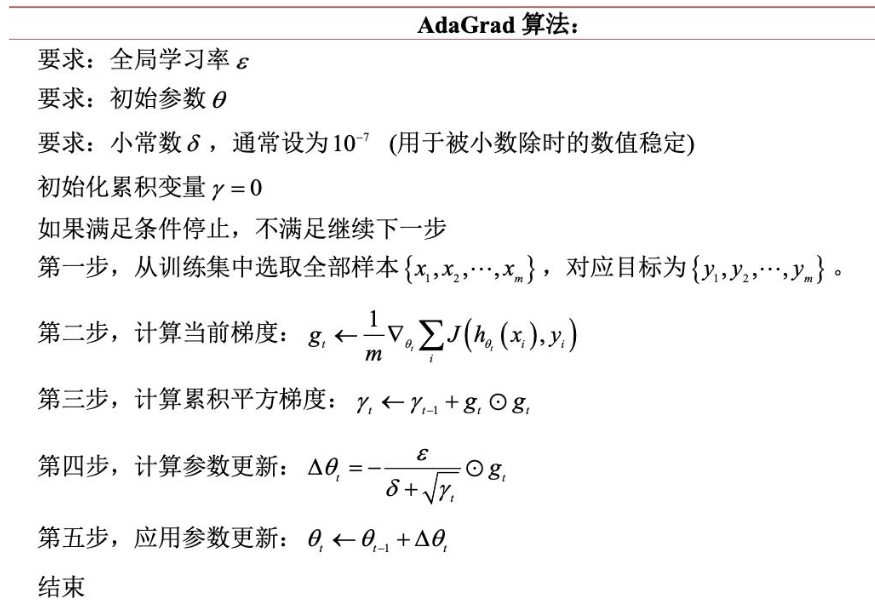

2.RMSProp：使用指数加权移动平均进行学习率更新，避免了AdaGrad前期下降过早收敛的缺点，添加衰减因子 $\rho$ 权衡过去与当前的梯度信息，
减少了因梯度不断累积造成的学习率大幅下降

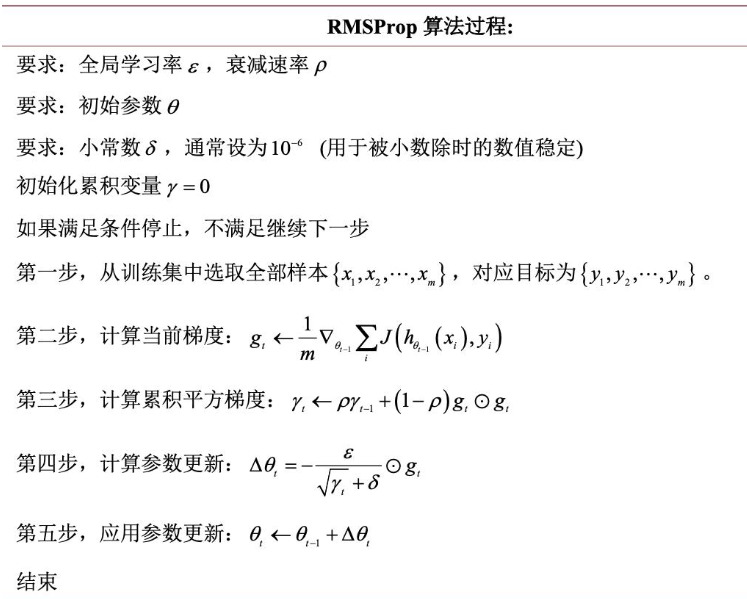

3.Adam：动量法+自适应学习率，使用m和v分别存储一阶动量和二阶动量。      变形：AdamW , Nadam RAdam等

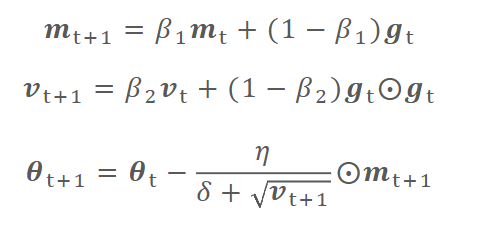


SGD泛化性能更好，Adam能快速脱离鞍点，收敛速度快。SGD适用于计算机视觉，Adam适用于NLP，RL，GAN等。
注：可以先使用Adam进行快速收敛，再使用SGD寻找更好的极值点



## 损失函数
训练的本质是优化损失函数

### 回归损失函数
1.平方误差损失MSE与绝对值损失MAE：MAE对于异常点更加鲁棒，MSE比MAE能更快速的收敛
2.Huber损失：误差较小时使用平方误差损失，误差较大时使用绝对值误差损失。 但需要人工确定误差 $\delta$ ，也是Huber的缺点

### 分类损失函数
1.交叉熵损失


## 正则化
泛化能力：过拟合、欠拟合
正则化能限制模型复杂度，减轻过拟合现象，提升泛化能力
1.L1、L2正则化：L1范数为向量各维度绝对值之和 $||x||_1 = \sum_i |x_i|$，L2范数为向量的几何长度 $||x||_2 = (\sum_i |x_i|^2)^{1/2}$，
优化目标为 $\arg \min_{\theta} \frac{1}{N} (\sum_{i}^N L(y_i , f(x_i , \theta )))$ 其中L为损失函数。

则加上L1正则化后 $\arg \min_{\theta} \frac{1}{N} (\sum_{i}^N L(y_i , f(x_i , \theta )) + \lambda |\theta|)$，
每次更新 $\theta = \theta - \frac{\alpha}{N} (\frac{\partial L}{\partial \theta} + \lambda sign(\theta))$

加入L2正则化后 $\arg \min_{\theta} \frac{1}{N} (\sum_{i}^N L(y_i , f(x_i , \theta )) + \lambda \theta^2)$，
$\theta = \theta - \frac{\alpha}{N} (\frac{\partial L}{\partial \theta} + 2\lambda \theta)$

L1正则化使参数趋近于0，L2正则化使参数减小


2.Dropout
训练时以概率p保留部分神经元，对每层的输出 $h = f(Wd(x) + b) \  \  \ d(x) = m * x \  At \ training \ time$ 在测试阶段对输出进行缩放(乘p) ，降低神经元之间的敏感度，增加整体的鲁棒性。
标准dropout和Inverted dropout（对保留的神经元放大1/p倍，在测试阶段可以不用对输出进行放缩）

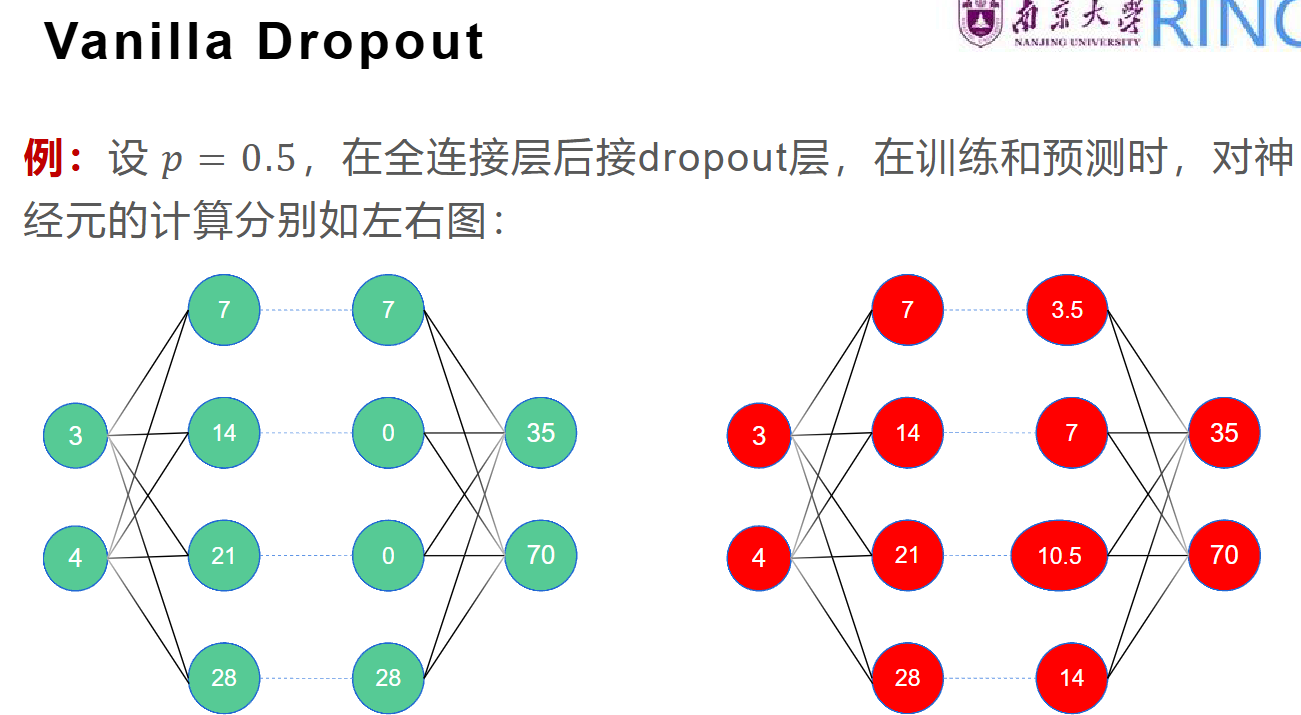

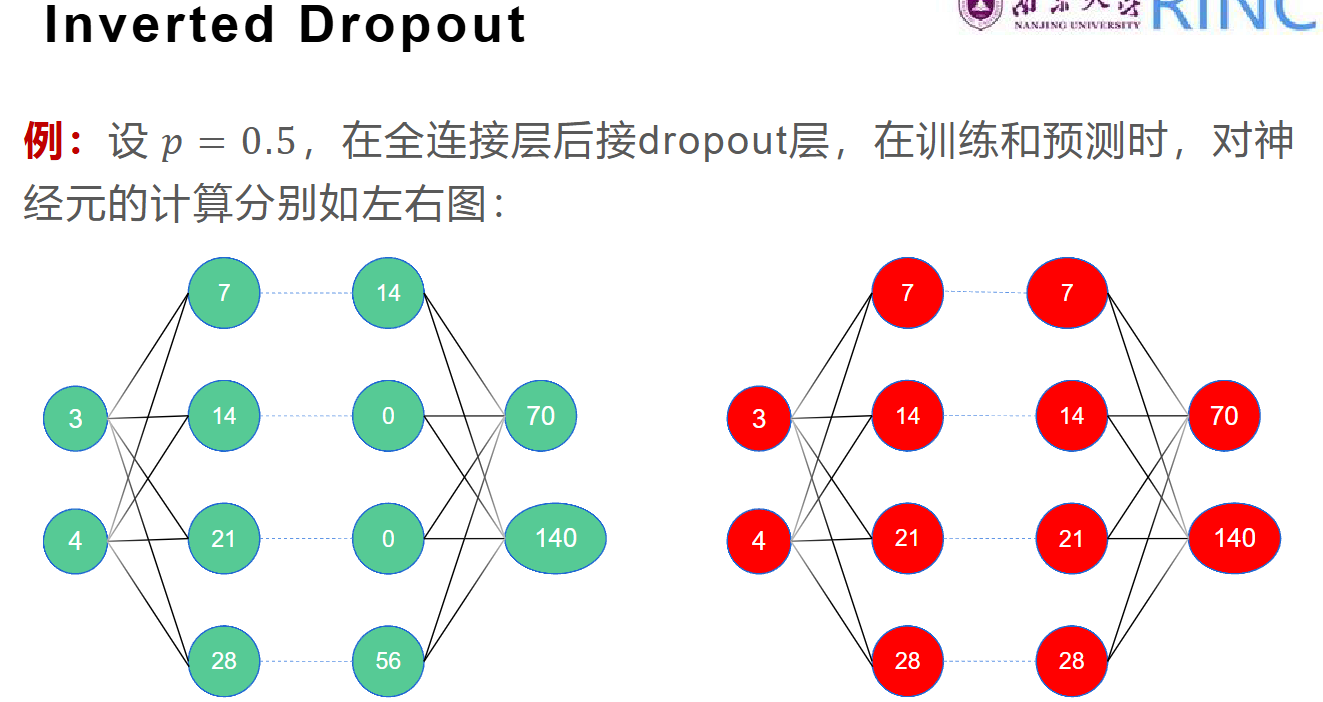

Dropout Connection：以概率 p 采样节点中的每个输入权值。进行推理时，对每个输入权重进行高斯分布采样。高斯分布的均值与方差与 p 有关


3.提前停止：验证集错误率不降反增时，提前停止训练

4.数据增强：比如对图像进行翻转、旋转、缩放等操作增强数据的多样性，或者从训练数据中抹除部分信息，或者混合多个样本模拟多目标的场景。自动增强在训练前确定数据增强空间和参数，使用时随机采样。
KeepAugment防止关键区域在增强过程中被磨除。对于文本数据，可以使用回译法、随机词替换、位置替换。通用的方法有向样本和标签中噪声注入（服从正态分布），或者在计算完梯度后，向梯度中加入服从正态分布的噪声，噪声随学习不断减弱

## 归一化
不同维度的数据取值范围差距较大
Min-Max归一化：$\hat{x} = \frac{x - min(x)}{max(x) - min(x)} \\$
Z-score归一化: $\hat{x} = \frac{x - \mu}{\sigma} \\$

在深度神经网络中，由于神经层数比较多，在通过梯度下降训练时，前面层参数变化会导致输入到下一层的分布发生变化，且越往后这个变化越大。如果前面发生了一个小偏移，到了越深的层这个偏移就会被扩大。
这样是不利于网络的训练。因此后面介绍的归一化方法主要为了稳定层输入的分布，来改善神经网络训练。


1.BatchNorm：对一批数据进行归一化，需要对 $\gamma 和 \beta$ 进行更新，通常初始值为 $\gamma = 1和 \beta = 0$，能够加快网络的收敛速度，但是训练与测试时统计量不一致，使用小的batch sizes时统计量不稳定；
不适用于RNN等动态网络


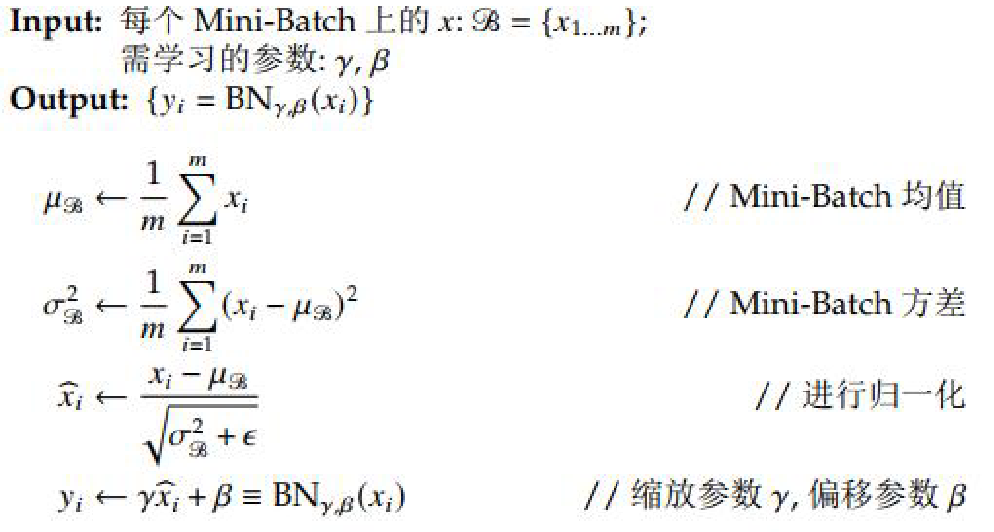

2.层归一化LN：计算每一层网络的均值和方差，并进行归一化以及进行放缩

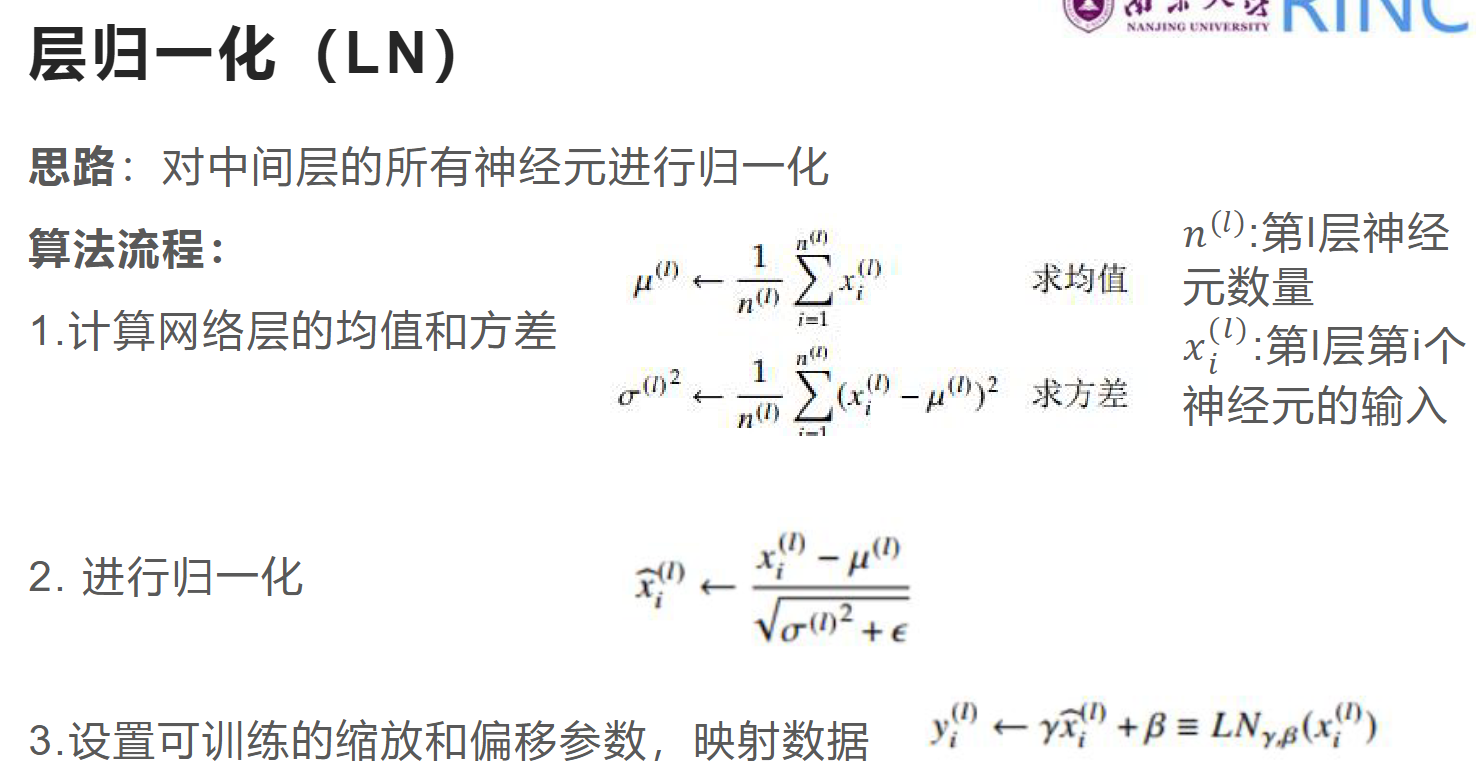

3.实例归一化  对于依赖于图像实例的任务

4.组归一化

## 参数初始化
好的初始化能够更快速的收敛到最优值
没有适配于任何网络结构的初始化方法，但要避免对称权重。不合理则会导致梯度爆炸和消失
1.基于固定方差的参数初始化  均匀分布 or Gaussian分布    但容易出现梯度消失
2.基于方差放缩的参数初始化  若一个神经元的输入连接很多，则每个输入连接上的权重应该小一些，以避免输入过大或过饱和。
且为了缓解梯度消失和梯度爆炸，应当尽可能的保持每个神经元的输入输出方差一致，根据神经元的连接数量来自适应地调整初始化分布的方差，这类方法称为方差缩放
       如：Xavier初始化，假设第l层的神经元 $a^{(l)}$ 接受前一层 $M_{l-1}$ 个神经元的输出，在假设 $w^{(l)}_i$ 与 $a^{(l-1)}_i$ 均值都为0，且相互独立 
       则 $a^{(l)}$ 的均值0，方差为 $M_{l-1} var(w_i^{(l)})var(a_i^{(l-1)})$ 也就是方差被放大了 $M_{l-1} var(w_i^{(l)})$ 倍，所以为了使信号不被
       过分放大或者减弱，需要将 $var(w_i^{(l)})= \frac{1}{M_{l-1}}$ ，同理在反向传播中将方差保持为 $var(w_i^{(l)})= \frac{1}{M_{l}}$
       折中考虑可以将 $var(w_i^{(l)})= \frac{2}{M_{l-1} + M_{l}}$，该方法对tanh效果较好，对于Relu效果不佳
       He初始化，只考虑前向传播 $var(w_i^{(l)})= \frac{2}{M_{l-1}}$，针对于Relu比Xavier效果好

3.正交初始化：初始化权重矩阵为正交矩阵，先用标准正态分布初始化一个矩阵，再根据奇异值分解为两个正交矩阵，其一作为权重矩阵。

偏置矩阵可初始化为全0矩阵，除非偏置作为输出单元，初始化偏置以获得正确的输出边缘的统计是有利的或需要选择偏置以避免初始化引起的太大饱和


## 网络预训练

网络预训练是采用相同结构的，并且已经训练好的网络权值作为初始值，在当前任务上再次进行训练。为了能够在更短时间内训练得到更好的网络性能，且相似的任务之间，训练好的神经网络可以复用，通常作为特征提取器

### 无监督训练
概率图模型用图结构来表示变量之间的概率依赖关系。图中的节点对应随机变量，连接表示随机变量之间的依赖关系。

马尔可夫随机场
图的顶点u对应变量x的概率只依赖其邻居节点对应的变量并且x对图中的其他任何节点是条件独立的

玻尔兹曼机BM
一种对称全连接的无向概率图，每个随机变量是二值的，BM中的参数包括连接权值矩阵W与偏置向量b, 能量函数定义为 $E(x) = - \sum_i b_i x_i - \sum_{i,j} w_{i,j}x_ix_j \\ $
通过训练使能量函数最小化

受限玻尔兹曼机RBM
是二分图结构的无向图模型，有可见状态向量v和隐藏状态变量h，能量函数为 $E(v , h) = - \sum_i a_i v_i - \sum_i b_i h_i - \sum_{i,j} v_iw_{ij}h_j \\ $

深度信念网络 DBN
逐层预训练，由多层RBM堆叠而成

自编码器AE
编码器-解码器，输入层x，输出层z，自监督学习。 $L = \sum_{i=1}^n ||z^{(n)} - x^{(n)}||_2^2$

堆叠自编码器

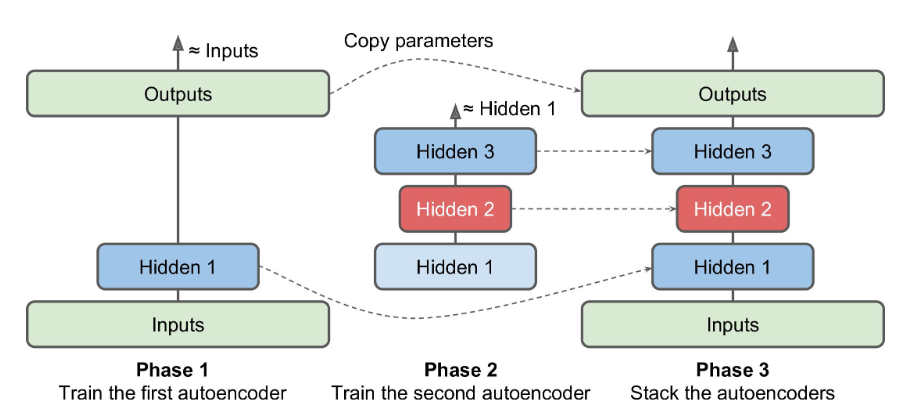

稀疏自编码器
在损失函数中加入稀疏性约束，来学习数据的稀疏表示。此约束鼓励自编码器使用特征空间中的少量活动神经元来表示输入数据，从而实现更高效、更稳健的特征提取。
$L = \sum_{i=1}^n ||z^{(n)} - x^{(n)}||_2^2 + \lambda||y^{(n)}||_1$  y为隐层变量


去噪自编码器DAE
学习从噪声输入中重建干净的数据

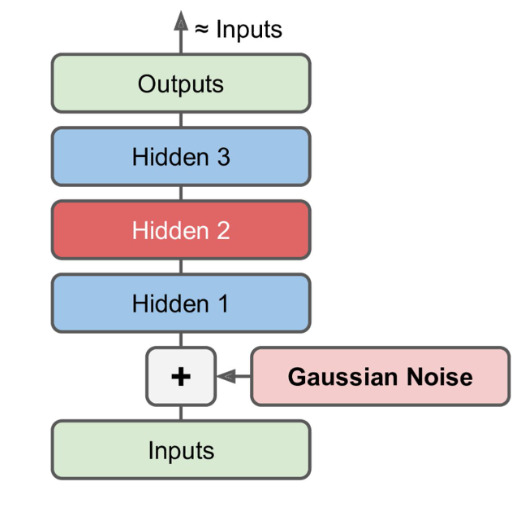

无监督预训练
如果有一个很大的数据集但绝大部分是未标注数据，可以使用所有的数据先进行无监督预训练，然后复用编码层来完成真正的任务。
神经网络的使用梯度下降法之所以训练困难，主要原因在于它的目标函数对于参数来说是非凸函数，因此在参数空间中存在多个局部极小值。
对于无监督的预训练所起到的作用，有这样的两个猜想:预训练相当于在优化过程中加入了限制条件，将参数放置在更适合监督训练的优化空间中;初始化将参数放置到了一个能够优化到更小极值的初始点上。


### 有监督训练
迁移学习
用已经训练好的网络作为自己网络的权重初始值，并通过自己的数据进行调整。实践中可以选出预训练模型中的部分层进行使用


对比学习
自监督表征学习
无监督学习：学习目标不需要人工标注
自监督学习：模型参数优化的目标函数中使用的标签是数据本身
表征学习：学习的目的是获取数据的表征模型


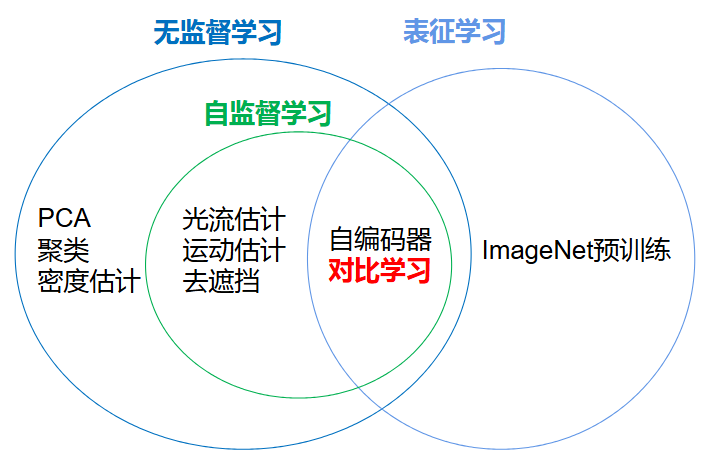

自编码器：重构越精确，表征质量越好
自监督学习任务的设计思想是让模型学习数据中隐含的先验知识，也就是现实世界的一般规律
对比学习中隐含的先验是数据标签与表征之间的相关性，即正样本对的表征互相接近，负样本对的表征互相远离。通过向量内积计算两个样本特征的相似度

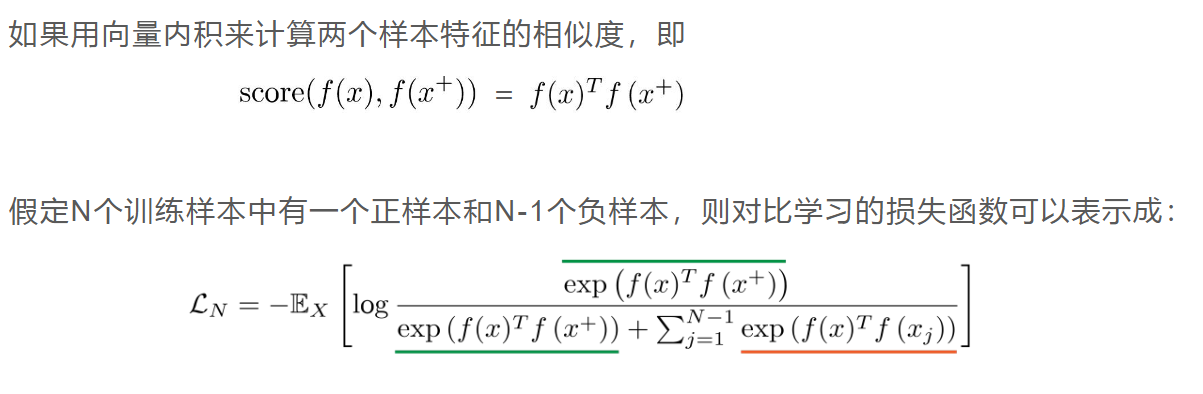

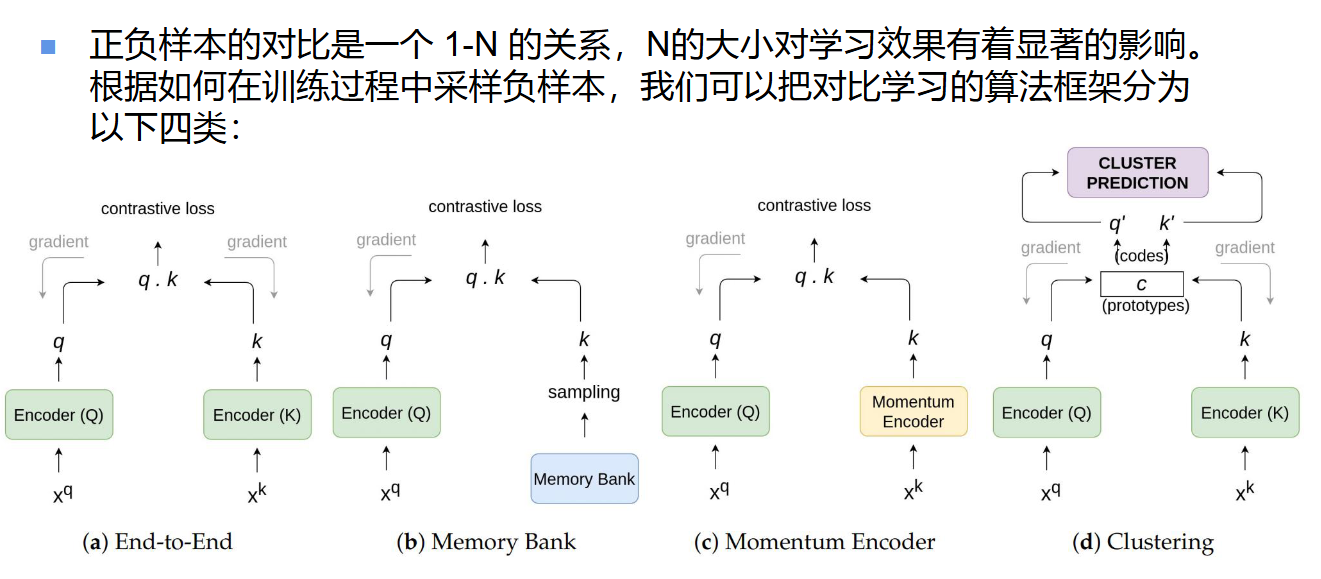